In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let us generate some test data:

In [179]:
x = np.arange(0,200,0.5)

In [180]:
delta = np.random.uniform(-30,30,x.size)

In [181]:
y = 4*x + delta

So the initial plot is something like this:

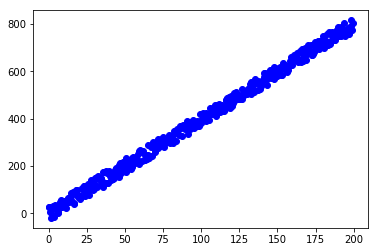

In [182]:
plt.scatter(x,y,color='blue')
plt.show()

**Awesome!**

Now lets start coding the linear regression problem.

First we need to pre-process our features. We have two cases:
1. We get a 1-D vector -> [1,2,3....]
2. We get an n-D vector -> [[1,2,3..], [3,6,5..].....]

Therefore we need to convert this into a feature set which our linear regression algorithm can understand. 
And one of the criteria for it being that we also need to add the x0 parameter to the feature set.

In [110]:
def convert_1d_array(features):
    new_features = np.empty((features.shape[0],1))
    for index, feature in enumerate(features):
        new_features[index] = np.array([feature])
    return new_features

In [111]:
def preprocessing(features):
    #if we have a 1-D array of length n convert it to a (n,1) shaped array
    if features.ndim == 1:
        features = convert_1d_array(features)
    
    #now we need to append the x0(=1) parameter to the feature vectors
    new_features = np.empty((features.shape[0],(features.shape[1]+1)))
    for index, feature in enumerate(features):
        new_features[index] = np.append([1],feature)
    return new_features

Now we have our preprocessing functions ready

The next this we need to code is our hypothesis function. So lets do that:

In [112]:
def hypothesis(feature, theta_vector):
    return np.sum(np.multiply(feature, theta_vector))

Now comes the big part. We need to code up our **Gradient Descent** algorithm

In [154]:
def gradient_descent(features, labels, theta_vector, learning_rate=0.000001):
    no_of_training_examples = features.shape[0]
    x_dimension = features.shape[1]
    #print theta_vector
    for theta_index, theta in enumerate(theta_vector):
        learning_summation = 0.0
        for feature_index, feature in enumerate(features):
            x_i = feature
            y_i = labels[feature_index]
            learning_summation += (hypothesis(x_i,theta_vector) - y_i) * x_i[theta_index]
            #print "Learning Sum: ",learning_summation
        theta = theta - learning_rate*learning_summation/no_of_training_examples
        #print "Theta: ", theta
        theta_vector[theta_index] = theta
    return theta_vector

Voila! We have our Gradient Descent algorithm!! 

In [188]:
def fit(features, labels):
    features = preprocessing(features)
    r2 = 0
    optimized_theta_vector = np.zeros(features.shape[1])
    y_pred = np.empty(y.shape[0])
    while r2 < 0.99:
        optimized_theta_vector = gradient_descent(features, labels, optimized_theta_vector)
        for index, feature in enumerate(features):
            y_pred[index] = hypothesis(feature, optimized_theta_vector)
        r2 = r_squared(features, labels, y_pred)
        #print "R2: ",r2
    return y_pred

def r_squared(features, labels, predictions):
    no_of_training_examples = features.shape[0]
    labels_mean = np.sum(labels)/no_of_training_examples
    ss_total = np.sum((labels - labels_mean) ** 2)
    ss_reg = np.sum((predictions - labels) ** 2)
    return (1 - ss_reg/ss_total)

Now lets see how this performs

In [189]:
y_pred = fit(x,y)

The above computation takes some time but it worked :D !

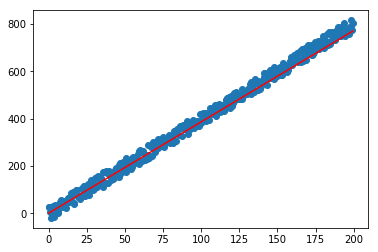

In [191]:
plt.scatter(x,y)
plt.plot(x,y_pred, color='r')
plt.show()

**So here are a few learnings:**
1. The more the number of training data you have, the better your R-squared will, so you can tweak R-squared to a very high value like 0.99 or 0.995 etc**
eg: In this case when we had a training set of 100, we could only achieve an R-squared of 0.97, but when we increased the training set to 400, we could get a R-squared of 0.99
2. Learning rate is important. If you see that your data is overflowing or basically not converging, it means that your gradient is not reaching the minima and is crossing it because you are taking big steps. Reduce the learning rate will help with that. But do not reduce it too much otherwise your algorithm will take a lot of time to execute.
eg: With the training set of 100, we had to reduce learning rate from 0.01 to 0.00001